In [100]:
# liberers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
sns.set(rc={'figure.figsize':(11.7,8.27)})#for the plt shape

In [101]:
data=pd.read_csv("bodyPerformance.csv")  
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [102]:
data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [103]:
data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [104]:
print(data.isnull().sum())
print("\n")
print(data.duplicated().sum)

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64


<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
13388    False
13389    False
13390    False
13391    False
13392    False
Length: 13393, dtype: bool>


In [105]:
data.replace("M", 0 , inplace = True)
data.replace("F", 1 , inplace = True)

data.replace("A", 0 , inplace = True)
data.replace("B", 1 , inplace = True)
data.replace("C", 2 , inplace = True)
data.replace("D", 3 , inplace = True)
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,2
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,3
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,3


In [106]:
data['age']=data.age.astype(int)
data['height_cm']=data.height_cm.astype(int)
data['weight_kg']=data.weight_kg.astype(int)
data['body fat_%']=data['body fat_%'].astype(int)
data['diastolic']=data.diastolic.astype(int)
data['systolic']=data.systolic.astype(int)
data['gripForce']=data.gripForce.astype(int)

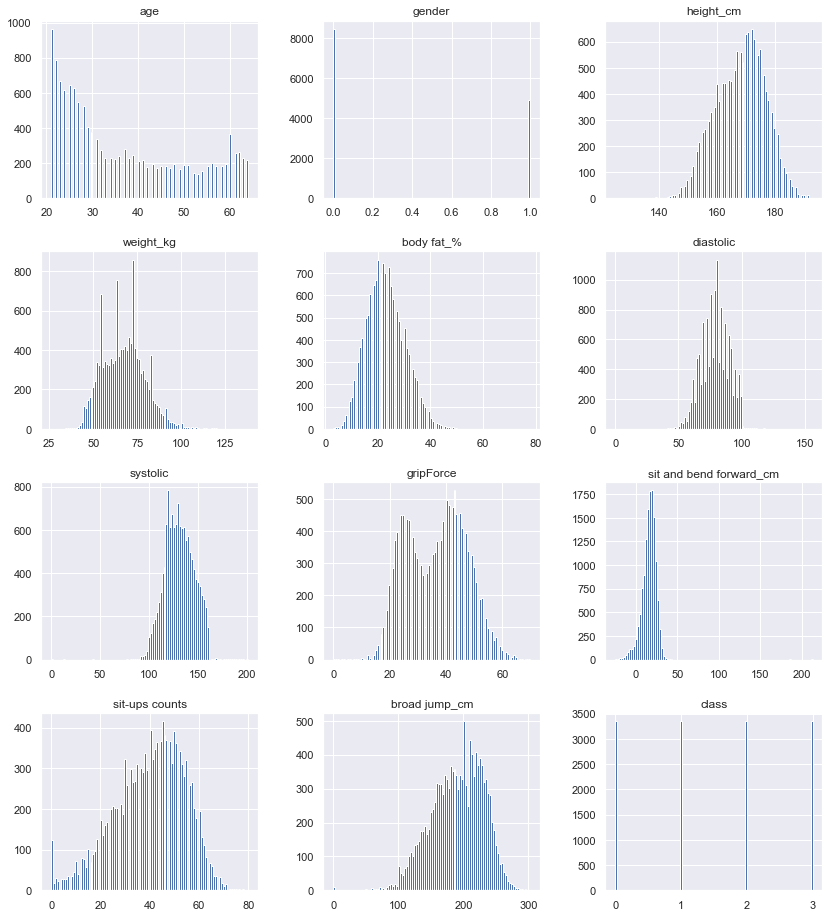

In [107]:
data.hist(bins=100, figsize=(14,16))
plt.show()

<AxesSubplot:>

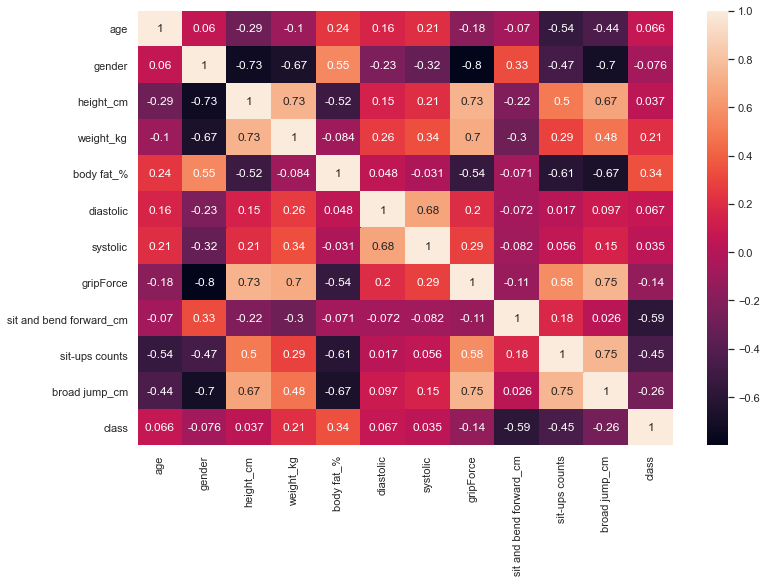

In [108]:
plt.figure(figsize=(12,8))
sns.heatmap( data.corr(), annot = True)

# Conclusions from crr matrix

 1. there is high relation between the Height and BroadJump this indicates that More Height is strongly related to higher BroadJump.
 2. there is high relation between the Height and GripForce this indicates that More Height is strongly related to more GripForce.
 3. there is high relation between the Height and Weight this indicates that More Height is strongly related to more Weight.
 4. there is high relation between the Weight and GripForce this indicates that More Weight is strongly related to more GripForce.
 5. there is relation between Systolic and Diastolic.
 6. there is high relation between the GripForce and BroadJump this indicates that More GripForce is strongly related to higher BroadJump.
7. there is high relation between the Sit-ups counts and BroadJump this indicates that More Sit-ups counts is strongly related to higher BroadJump.

<AxesSubplot:>

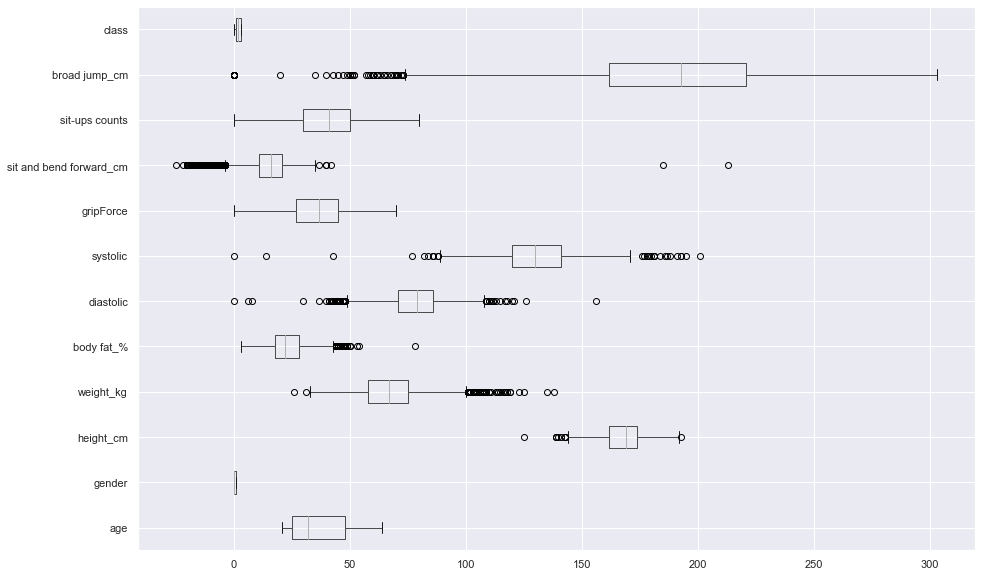

In [109]:
plt.figure(figsize=(15,10))
data.boxplot(vert=0) 

In [110]:
#Replacing some names of columns to be easily used in the way we implement it to remove outliers 

data.columns = data.columns.str.replace('sit and bend forward_cm', 'sit_and_bend_forward_cm')
data.columns = data.columns.str.replace('sit-ups_counts', 'sit_ups_counts')
data.columns = data.columns.str.replace('broad jump_cm', 'broad_jump_cm')
data.columns = data.columns.str.replace('body fat_%', 'body_fat_per')
data


,age,gender,height_cm,weight_kg,body_fat_per,diastolic,systolic,gripForce,sit_and_bend_forward_cm,sit-ups counts,broad_jump_cm,class
0,27,0,172,75,21,80,130,54,18.4,60.0,217.0,2
1,25,0,165,55,15,77,126,36,16.3,53.0,229.0,0
2,31,0,179,78,20,92,152,44,12.0,49.0,181.0,2
3,32,0,174,71,18,76,147,41,15.2,53.0,219.0,1
4,28,0,173,67,17,70,127,43,27.1,45.0,217.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25,0,172,71,16,74,141,35,17.4,47.0,198.0,2
13389,21,0,179,63,12,74,128,33,1.1,48.0,167.0,3
13390,39,0,177,80,20,78,132,63,16.4,45.0,229.0,0
13391,64,1,146,57,40,68,121,19,9.2,0.0,75.0,3


In [111]:

q1=data["broad_jump_cm"].quantile(0.25)
q3=data["broad_jump_cm"].quantile(0.75)
iqr=q3-q1
min_thresold=q1-1.5*iqr
max_thresold =q3+1.5*iqr

data2 = data[(data.broad_jump_cm<max_thresold) & (data.broad_jump_cm>min_thresold)]
data2.shape

(13336, 12)

In [112]:
 

q1=data2["sit_and_bend_forward_cm"].quantile(0.25)
q3=data2["sit_and_bend_forward_cm"].quantile(0.75)
iqr=q3-q1
min_thresold=q1-1.5*iqr
max_thresold =q3+1.5*iqr

data3 = data2[(data2.sit_and_bend_forward_cm<max_thresold) & (data2.sit_and_bend_forward_cm>min_thresold)]
data3.shape 

(12947, 12)

In [113]:
 

q1=data3["systolic"].quantile(0.25)
q3=data3["systolic"].quantile(0.75)
iqr=q3-q1
min_thresold=q1-1.5*iqr
max_thresold =q3+1.5*iqr

data4 = data3[(data3.systolic<max_thresold) & (data3.systolic>min_thresold)]
data4.shape

(12919, 12)

In [114]:
 

q1=data4["diastolic"].quantile(0.25)
q3=data4["diastolic"].quantile(0.75)
iqr=q3-q1
min_thresold=q1-1.5*iqr
max_thresold =q3+1.5*iqr
 
data5 = data4[(data4.diastolic<max_thresold) & (data4.diastolic>min_thresold)]
data5.shape

(12879, 12)

In [115]:
 
q1=data5["body_fat_per"].quantile(0.25)
q3=data5["body_fat_per"].quantile(0.75)
iqr=q3-q1
min_thresold=q1-1.5*iqr
max_thresold =q3+1.5*iqr

data6 = data5[(data5.body_fat_per<max_thresold) & (data5.body_fat_per>min_thresold)]
data6.shape

(12788, 12)

In [116]:
 
q1=data6["weight_kg"].quantile(0.25)
q3=data6["weight_kg"].quantile(0.75)
iqr=q3-q1
min_thresold=q1-1.5*iqr
max_thresold =q3+1.5*iqr

data7 = data6[(data6.weight_kg<max_thresold) & (data6.weight_kg>min_thresold)]
data7.shape

(12723, 12)

In [117]:
  
q1=data7["height_cm"].quantile(0.25)
q3=data7["height_cm"].quantile(0.75)
iqr=q3-q1
min_thresold=q1-1.5*iqr
max_thresold =q3+1.5*iqr    
    
data8 = data7[(data7.height_cm<max_thresold) & (data7.height_cm>min_thresold)]
data8.shape

(12711, 12)

<AxesSubplot:>

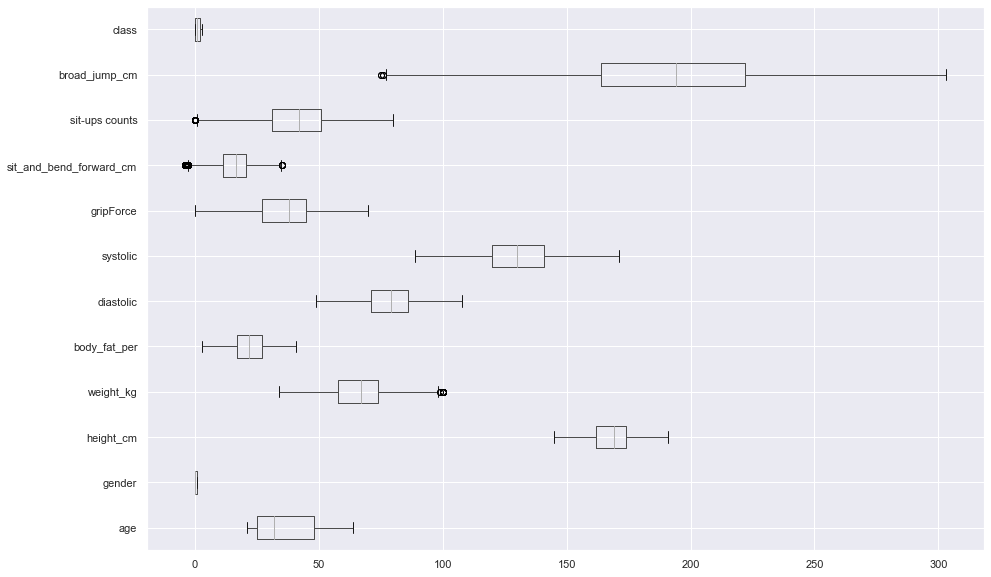

In [118]:
plt.figure(figsize=(15,10))
data8.boxplot(vert=0) 

<h1>model

In [119]:
X = data8.iloc[:, :-1].values
y = data8.iloc[:, -1].values  

In [120]:
# from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [121]:
# from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [122]:
import math
math.sqrt(len(y_test))

61.75759062657804

In [123]:
time_start_KNeighborsClassifier = time.process_time()
# from sklearn.neighbors import KNeighborsClassifier
knclf = KNeighborsClassifier(n_neighbors=61 )
knclf.fit(X_train, y_train)

y_predict = knclf.fit(X_train, y_train).predict(X_test)



knclf_score_train = knclf.score(X_train,y_train)
knclf_score_test = knclf.score(X_test,y_test)
print(knclf_score_train)
print(knclf_score_test )

f_time_KNeighborsClassifier = time.process_time()
time_KNeighborsClassifier= f_time_KNeighborsClassifier - time_start_KNeighborsClassifier
print("\nmodel take {}S".format(time_KNeighborsClassifier))

0.6252669439136788
0.6114315679077085

model take 2.109375S


In [124]:
time_start_LogisticRegression = time.process_time()
# from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)


y_predict = lr.fit(X_train, y_train).predict(X_test)


lr_score_train = lr.score(X_train,y_train)
lr_score_test = lr.score(X_test,y_test) 
print(lr_score_train)
print(lr_score_test)

f_time_LogisticRegression = time.process_time()
time_LogisticRegression = f_time_LogisticRegression - time_start_LogisticRegression
print("\nmodel take {}S".format(time_LogisticRegression))

0.6024502641339777
0.6082852648138437

model take 1.234375S


In [125]:
time_start_RandomForestClassifier = time.process_time()
# from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=25)
rf.fit(X_train,y_train)

y_predict =rf.fit(X_train, y_train).predict(X_test)
 
rf_score_train = rf.score(X_train,y_train)
rf_score_test = rf.score(X_test,y_test)
print(rf_score_train)
print(rf_score_test)

f_time_RandomForestClassifier = time.process_time()
time_RandomForestClassifier = f_time_RandomForestClassifier - time_start_RandomForestClassifier
print("\nmodel take {}S".format(time_RandomForestClassifier))

0.9995504102506463
0.7000524383848977

model take 1.5S


In [126]:
time_start_svm = time.process_time()

from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)



svm_score_train = svclassifier.score(X_train,y_train)
svm_score_test = svclassifier.score(X_test,y_test) 
print(lr_score_train)
print(lr_score_test)

f_time_svm = time.process_time()
time_svm = f_time_svm- time_start_svm
print("\nmodel take {}S".format(time_svm))

0.6024502641339777
0.6082852648138437

model take 8.984375S


In [127]:
time_start_GaussianNB = time.process_time()
# from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit( X_train,y_train)


y_predict = nb.fit(X_train, y_train).predict(X_test)

nb_score_train= nb.score(X_train,y_train)
nb_score_test = nb.score(X_test,y_test)
print( nb_score_train)
print( nb_score_test)

f_time_GaussianNB = time.process_time()
time_GaussianNB = f_time_GaussianNB - time_start_GaussianNB
print("\nmodel take {}S".format(time_GaussianNB))

0.5325390581094751
0.5346093340325118

model take 0.015625S


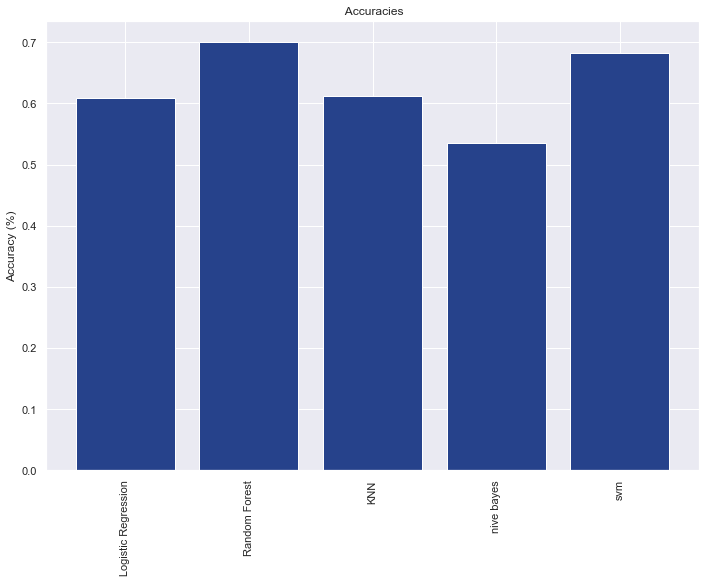

In [128]:
predictors_group = ('Logistic Regression','Random Forest','KNN',"nive bayes","svm")
x_pos = np.arange(len(predictors_group))
accuracies = [lr_score_test, rf_score_test, knclf_score_test,nb_score_test,svm_score_test]
    
plt.bar(x_pos, accuracies, align='center', color='#26428b')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)',)
plt.title(' Accuracies')
plt.show()

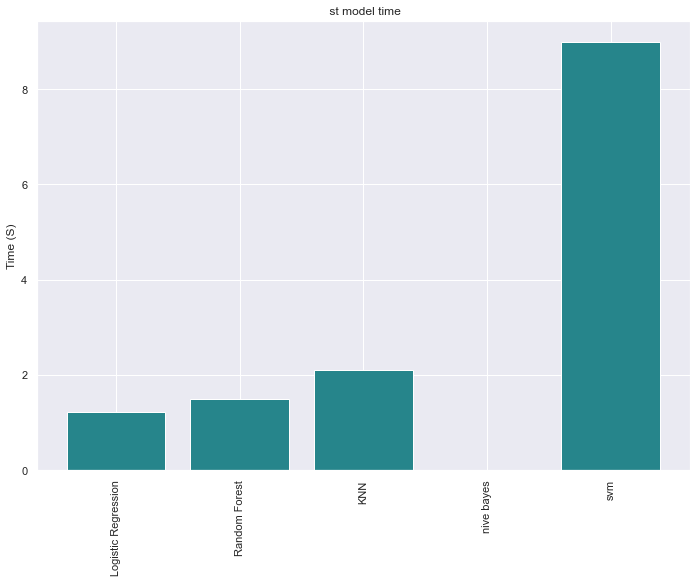

In [129]:
predictors_group = ('Logistic Regression','Random Forest','KNN',"nive bayes","svm")
x_pos = np.arange(len(predictors_group))
times = [time_LogisticRegression, time_RandomForestClassifier, time_KNeighborsClassifier,time_GaussianNB,time_svm]
    
plt.bar(x_pos, times, align='center', color='#26858b')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Time (S)',)
plt.title(' st model time')
plt.show()

<h1>PCA

In [130]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2',"principal component 3","principal component 4"])

In [131]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,-34.815014,-2.727606,-5.087618,8.090656
1,-36.804203,-15.982502,-6.887654,-14.550696
2,-0.450985,23.387204,-16.292400,15.852195
3,-32.552808,7.795158,-6.950220,-1.461815
4,-27.437330,-11.239599,0.836150,-2.521930


In [132]:
# from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size = 0.30, random_state = 0)

In [133]:
# from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [134]:
time_start_PCA_KNeighborsClassifier = time.process_time()
# from sklearn.neighbors import KNeighborsClassifier
knclf = KNeighborsClassifier(n_neighbors=61 )
knclf.fit(X_train, y_train)

y_predict = knclf.fit(X_train, y_train).predict(X_test)



knclf_score_train = knclf.score(X_train,y_train)
knclf_score_test = knclf.score(X_test,y_test)
print(knclf_score_train)
print(knclf_score_test )

f_time_PCA_KNeighborsClassifier = time.process_time()
time_PCA_KNeighborsClassifier = f_time_PCA_KNeighborsClassifier - time_start_PCA_KNeighborsClassifier
print("\nPCA_model take {} S".format(time_PCA_KNeighborsClassifier))

0.4701584803866472
0.4517566858940745

PCA_model take 0.6875 S


In [135]:
time_start_PCA_LogisticRegression = time.process_time()
# from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)


y_predict = lr.fit(X_train, y_train).predict(X_test)


lr_score_train = lr.score(X_train,y_train)
lr_score_test = lr.score(X_test,y_test) 
print(lr_score_train)
print(lr_score_test)

f_time_PCA_LogisticRegression = time.process_time()
time_PCA_LogisticRegression = f_time_PCA_LogisticRegression - time_start_PCA_LogisticRegression
print("\nPCA_model take {} S".format(time_PCA_LogisticRegression))

0.43632685174778013
0.43943366544310436

PCA_model take 0.375 S


In [136]:
time_start_svm = time.process_time()

from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)



svm_score_train = svclassifier.score(X_train,y_train)
svm_score_test = svclassifier.score(X_test,y_test) 
print(lr_score_train)
print(lr_score_test)

f_time_svm = time.process_time()
time_svm = f_time_svm- time_start_svm
print("\npca_model take {}S".format(time_svm))

0.43632685174778013
0.43943366544310436

pca_model take 11.15625S


In [137]:
time_start_PCA_RandomForestClassifier = time.process_time()
# from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=25)
rf.fit(X_train,y_train)

y_predict =rf.fit(X_train, y_train).predict(X_test)
 
rf_score_train = rf.score(X_train,y_train)
rf_score_test = rf.score(X_test,y_test)
print(rf_score_train)
print(rf_score_test)

f_time_PCA_RandomForestClassifier = time.process_time()
time_PCA_RandomForestClassifier = f_time_PCA_RandomForestClassifier - time_start_PCA_RandomForestClassifier
print("\nPCA_model take {} S".format(time_PCA_RandomForestClassifier))

0.9985388333146005
0.40954378605138964

PCA_model take 0.84375 S


In [138]:
time_start_PCA_GaussianNB = time.process_time()
# from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit( X_train,y_train)


y_predict = nb.fit(X_train, y_train).predict(X_test)

nb_score_train= nb.score(X_train,y_train)
nb_score_test = nb.score(X_test,y_test)
print( nb_score_train)
print( nb_score_test)

f_time_PCA_GaussianNB = time.process_time()
time_PCA_GaussianNB = f_time_PCA_GaussianNB - time_start_PCA_GaussianNB
print("\nPCA_model take {} S".format(time_PCA_GaussianNB))

0.43464089018770374
0.43943366544310436

PCA_model take 0.0 S


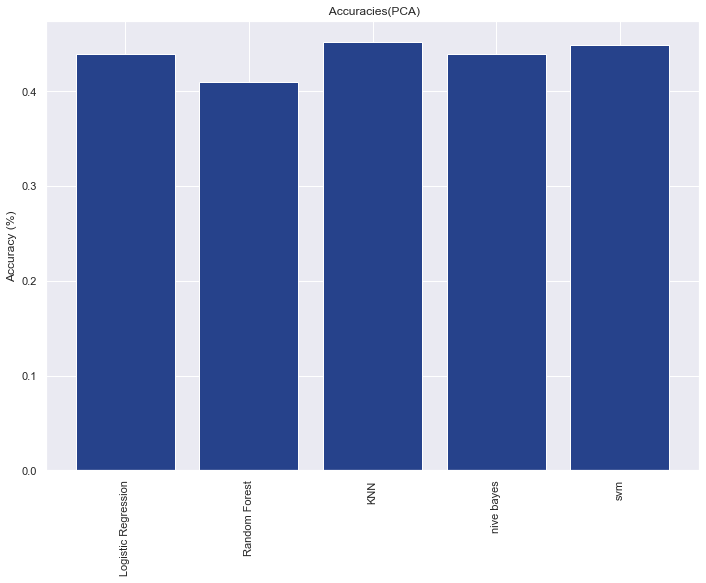

In [139]:
predictors_group = ('Logistic Regression','Random Forest','KNN',"nive bayes","svm")
x_pos = np.arange(len(predictors_group))
accuracies = [lr_score_test, rf_score_test, knclf_score_test,nb_score_test,svm_score_test]
    
plt.bar(x_pos, accuracies, align='center', color='#26428b')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)',)
plt.title(' Accuracies(PCA)')
plt.show()

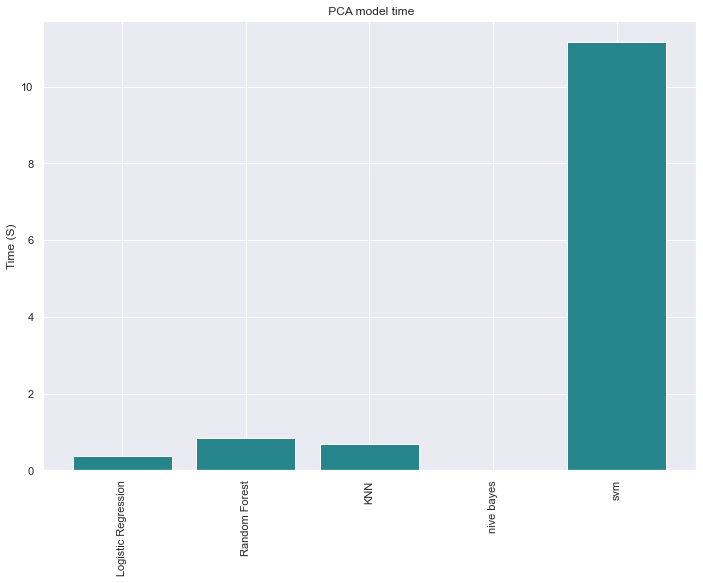

In [140]:
predictors_group = ('Logistic Regression','Random Forest','KNN',"nive bayes","svm")
x_pos = np.arange(len(predictors_group))
times = [time_PCA_LogisticRegression, time_PCA_RandomForestClassifier, time_PCA_KNeighborsClassifier,time_PCA_GaussianNB,time_svm]
    
plt.bar(x_pos, times, align='center', color='#26858b')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Time (S)',)
plt.title(' PCA model time')
plt.show()

<h1>Lasso regression

In [141]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [142]:
features=list(data8.columns.values)
features= features[:-1]
features

['age',
 'gender',
 'height_cm',
 'weight_kg',
 'body_fat_per',
 'diastolic',
 'systolic',
 'gripForce',
 'sit_and_bend_forward_cm',
 'sit-ups counts',
 'broad_jump_cm']

In [143]:
X = data8.iloc[:, :-1].values
y = data8.iloc[:, -1].values  

In [144]:
# from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [145]:
# from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [146]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [147]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [148]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 2/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 3/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 4/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 5/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 1/5] END ...............................model__alpha=0.2; total time=   0.0s
[CV 2/5] END ...............................model__alpha=0.2; total time=   0.0s
[CV 3/5] END ...............................model__alpha=0.2; total time=   0.0s
[CV 4/5] END ...............................model__alpha=0.2; total time=   0.0s
[CV 5/5] END ...............................model__alpha=0.2; total time=   0.0s
[CV 1/5] END ...............model__alpha=0.30000000000000004; total time=   0.0s
[CV 2/5] END ...............model__alpha=0.3000

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [149]:
search.best_params_

{'model__alpha': 0.1}

In [150]:





coefficients = search.best_estimator_.named_steps['model'].coef_

In [151]:
importance = np.abs(coefficients)

In [152]:
importance

array([0.06504332, 0.        , 0.        , 0.07907872, 0.05440352,
       0.        , 0.        , 0.        , 0.47916596, 0.33962315,
       0.        ])

In [153]:
np.array(features)[importance > 0]

array(['age', 'weight_kg', 'body_fat_per', 'sit_and_bend_forward_cm',
       'sit-ups counts'], dtype='<U23')

In [154]:
np.array(features)[importance == 0]

array(['gender', 'height_cm', 'diastolic', 'systolic', 'gripForce',
       'broad_jump_cm'], dtype='<U23')

In [155]:
data_Lasso= data8[['age', 'weight_kg', 'body_fat_per', 'sit_and_bend_forward_cm',
       'sit-ups counts',"class"]]

In [156]:
data_Lasso.head()

,age,weight_kg,body_fat_per,sit_and_bend_forward_cm,sit-ups counts,class
0,27,75,21,18.4,60.0,2
1,25,55,15,16.3,53.0,0
2,31,78,20,12.0,49.0,2
3,32,71,18,15.2,53.0,1
4,28,67,17,27.1,45.0,1


In [157]:
X = data_Lasso.iloc[:, :-1].values
y = data_Lasso.iloc[:, -1].values 

In [158]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [160]:
time_start_lasso_KNeighborsClassifier = time.process_time()
# from sklearn.neighbors import KNeighborsClassifier
knclf = KNeighborsClassifier(n_neighbors=61 )
knclf.fit(X_train, y_train)

y_predict = knclf.fit(X_train, y_train).predict(X_test)



knclf_score_train = knclf.score(X_train,y_train)
knclf_score_test = knclf.score(X_test,y_test)
print(knclf_score_train)
print(knclf_score_test )

f_time_lasso_KNeighborsClassifier = time.process_time()
time_lasso_KNeighborsClassifier = f_time_lasso_KNeighborsClassifier - time_start_lasso_KNeighborsClassifier
print("lasso_model take {} S".format(time_lasso_KNeighborsClassifier))

0.661234123861976
0.6478762454116413
lasso_model take 0.796875 S


In [161]:
time_start_lasso_LogisticRegression = time.process_time()
# from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1040)
lr.fit(X_train,y_train)


y_predict = lr.fit(X_train, y_train).predict(X_test)


lr_score_train = lr.score(X_train,y_train)
lr_score_test = lr.score(X_test,y_test) 
print(lr_score_train)
print(lr_score_test)

f_time_lasso_LogisticRegression = time.process_time()
time_lasso_LogisticRegression = f_time_lasso_LogisticRegression - time_start_lasso_LogisticRegression
print("lasso_model take {} S".format(time_lasso_LogisticRegression))

0.5765988535461392
0.5765600419507079
lasso_model take 14.359375 S


In [162]:
time_start_svm = time.process_time()

from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)



svm_score_train = svclassifier.score(X_train,y_train)
svm_score_test = svclassifier.score(X_test,y_test) 
print(lr_score_train)
print(lr_score_test)

f_time_svm = time.process_time()
time_svm = f_time_svm- time_start_svm
print("\lasso_model take {}S".format(time_svm))

0.5765988535461392
0.5765600419507079
\lasso_model take 10.046875S


In [163]:
time_start_lasso_RandomForestClassifier= time.process_time()
# from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=25)
rf.fit(X_train,y_train)

y_predict =rf.fit(X_train, y_train).predict(X_test)
 
rf_score_train = rf.score(X_train,y_train)
rf_score_test = rf.score(X_test,y_test)
print(rf_score_train)
print(rf_score_test)

f_time_lasso_RandomForestClassifier = time.process_time()
time_lasso_RandomForestClassifier = f_time_lasso_RandomForestClassifier - time_start_lasso_RandomForestClassifier
print("lasso_model take {} S".format(time_lasso_RandomForestClassifier))

0.9983140384399236
0.6937598321971683
lasso_model take 0.421875 S


In [164]:
time_start_lasso_GaussianNB= time.process_time()
# from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit( X_train,y_train)


y_predict = nb.fit(X_train, y_train).predict(X_test)

nb_score_train= nb.score(X_train,y_train)
nb_score_test = nb.score(X_test,y_test)
print( nb_score_train)
print( nb_score_test)

f_time_lasso_GaussianNB = time.process_time()
time_lasso_GaussianNB = f_time_lasso_GaussianNB - time_start_lasso_GaussianNB
print("lasso_model take {} S".format(time_lasso_GaussianNB))

0.5491738788355626
0.5537493445201888
lasso_model take 0.015625 S


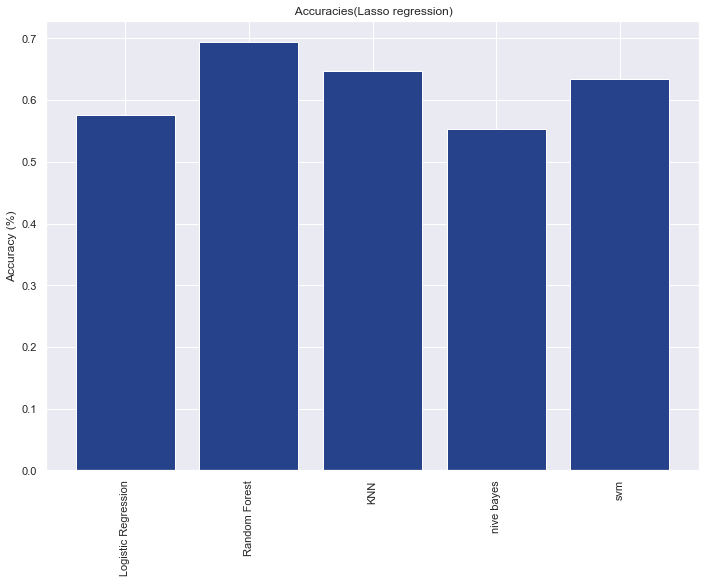

In [165]:
predictors_group = ('Logistic Regression','Random Forest','KNN',"nive bayes","svm")
x_pos = np.arange(len(predictors_group))
accuracies = [lr_score_test, rf_score_test, knclf_score_test,nb_score_test,svm_score_test]
    
plt.bar(x_pos, accuracies, align='center', color='#26428b')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)',)
plt.title(' Accuracies(Lasso regression)')
plt.show()

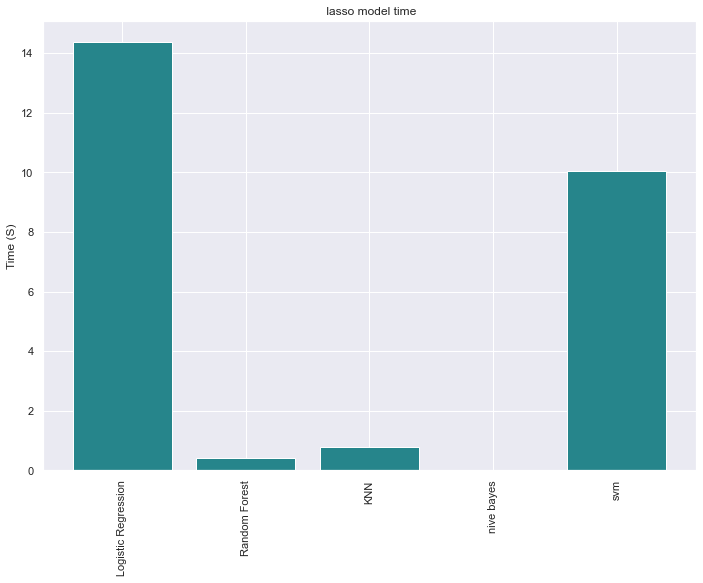

In [166]:
dictors_group = ('Logistic Regression','Random Forest','KNN',"nive bayes","svm")
x_pos = np.arange(len(predictors_group))
times = [time_lasso_LogisticRegression, time_lasso_RandomForestClassifier, time_lasso_KNeighborsClassifier,time_lasso_GaussianNB,time_svm]
    
plt.bar(x_pos, times, align='center', color='#26858b')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Time (S)',)
plt.title(' lasso model time')
plt.show()